In [1]:
projPath_load='/home/alvaro/notebook/jupyterenv/bin/TFM/DATA/dfA_n2_zone_aturat_index.csv'

In [2]:
projPath_save='/home/alvaro/notebook/jupyterenv/bin/TFM/DATA/'

In [3]:
month = '202206'
darsena = '_DM'

In [4]:
buffer_basin = 20 #m
buffer_dock = 30 #m
buffer_basin1 = 150 #m

min_points = 10

In [5]:
import numpy as np
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from scipy.signal import medfilt

In [6]:
%matplotlib notebook

In [7]:
moll_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/MollsDarsenaMorrot_noTalo.shp')
dm_map = gpd.read_file('/home/alvaro/notebook/jupyterenv/bin/TFM/22-23_Maniobres-20221022T161922Z-001/22-23_Maniobres/data/maps/DarsenaMorrot.shp')

In [8]:
dm_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
dm_buffer = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin).to_crs(4326))
dm_buffer.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
dm_buffer_z2 = gpd.GeoDataFrame(geometry = dm_map.to_crs(32631).buffer(buffer_basin1).to_crs(4326))
dm_buffer_z2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
moll_buffer = gpd.GeoDataFrame(geometry = moll_map.to_crs(32631).buffer(buffer_dock, cap_style = 2,join_style = 2).to_crs(4326))

<IPython.core.display.Javascript object>


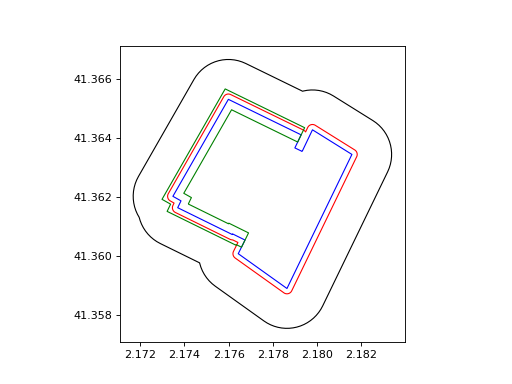

<AxesSubplot:>

In [12]:
fig, ax = plt.subplots()
dm_map.plot(ax = ax, fc = 'none', ec = 'blue')
dm_buffer.plot(ax = ax, fc = 'none', ec = 'red')
moll_buffer.plot(ax = ax, fc = 'none', ec = 'green')
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')

In [13]:
dfA_n2=pd.read_csv(projPath_load)

In [14]:
len(dfA_n2)

57339

In [15]:
dft=dfA_n2.loc[289:478,:].copy()

In [16]:
len(dft)

190

In [17]:
dft.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,shiptype,draught,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort
289,2022-06-01 01:27:50,247383500,0,-7.0,2.0,2.17732,41.36455,9.4,119.0,2022-06-01,...,74,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,ent
290,2022-06-01 01:27:58,247383500,0,-7.0,2.0,2.17732,41.36455,8.5,119.0,2022-06-01,...,74,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN
291,2022-06-01 01:28:09,247383500,0,-6.0,2.0,2.17732,41.36456,9.1,119.0,2022-06-01,...,74,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN
292,2022-06-01 01:28:19,247383500,0,-1.0,1.0,2.17732,41.36457,9.2,119.0,2022-06-01,...,74,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN
293,2022-06-01 01:28:30,247383500,0,5.0,1.0,2.17733,41.36458,9.2,119.0,2022-06-01,...,74,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN


In [18]:
dft.aturat.unique()

array([nan,  1.])

In [19]:
dft['real_atur']=0

In [20]:
dft.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,draught,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort,real_atur
289,2022-06-01 01:27:50,247383500,0,-7.0,2.0,2.17732,41.36455,9.4,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,ent,0
290,2022-06-01 01:27:58,247383500,0,-7.0,2.0,2.17732,41.36455,8.5,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
291,2022-06-01 01:28:09,247383500,0,-6.0,2.0,2.17732,41.36456,9.1,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
292,2022-06-01 01:28:19,247383500,0,-1.0,1.0,2.17732,41.36457,9.2,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
293,2022-06-01 01:28:30,247383500,0,5.0,1.0,2.17733,41.36458,9.2,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0


# FUNCTION DEFINITION

In [21]:
def realparado (dft):
    df=dft.copy()
    df['parado'] = (df['speed'] == 0)
    df['consecutivos'] = (df['parado'] != df['parado'].shift()).cumsum()
    dif = df.loc[df['speed']==0].groupby('consecutivos')
    grupos = dif['time_stamp'].apply(lambda x: pd.to_datetime(x.iloc[-1]) - pd.to_datetime(x.iloc[0]))
    grupos_filtrados = grupos[grupos >= pd.Timedelta(minutes = 10)]
    indices = grupos_filtrados.index.values
    for consecutivo in indices:
        df.loc[df['consecutivos'] == consecutivo, 'real_atur'] = 1
    dft['real_atur'] = df['real_atur']
    print (dft)

# FUNCTION DEFINITION MEDIA MOVIL

In [22]:
def realparado1 (dft):
    df=dft.copy()
    df['speed_window'] = df['speed'].rolling(window=4).mean()
    df['parado'] = (df['speed_window'] < 1)
    df['consecutivos'] = (df['parado'] != df['parado'].shift()).cumsum()
    dif = df.loc[df['speed_window']<1].groupby('consecutivos')
    grupos = dif['time_stamp'].apply(lambda x: pd.to_datetime(x.iloc[-1]) - pd.to_datetime(x.iloc[0]))
    grupos_filtrados = grupos[grupos >= pd.Timedelta(minutes = 10)]
    indices = grupos_filtrados.index.values
    for consecutivo in indices:
        df.loc[df['consecutivos'] == consecutivo, 'real_atur'] = 1
    dft['real_atur'] = df['real_atur']
    print (dft)

# FUNCTION DEFINITION COMBINACION 

In [23]:
def realparado2 (df):
    realparado(df)
    l1 = len(df['real_atur'])
    l2 = len(df.loc[df['real_atur']==1,:])
    if l2/l1 < 0.36:
        df['real_atur']=0
        realparado1(df)
    else:
        pass

# 247383500

In [22]:
realparado(dft)

              time_stamp       mmsi  status  turn  speed      lon       lat  \
289  2022-06-01 01:27:50  247383500       0  -7.0    2.0  2.17732  41.36455   
290  2022-06-01 01:27:58  247383500       0  -7.0    2.0  2.17732  41.36455   
291  2022-06-01 01:28:09  247383500       0  -6.0    2.0  2.17732  41.36456   
292  2022-06-01 01:28:19  247383500       0  -1.0    1.0  2.17732  41.36457   
293  2022-06-01 01:28:30  247383500       0   5.0    1.0  2.17733  41.36458   
..                   ...        ...     ...   ...    ...      ...       ...   
474  2022-06-01 04:48:13  247383500       5  16.0   40.0  2.17802  41.36000   
475  2022-06-01 04:48:22  247383500       5  14.0   41.0  2.17796  41.35983   
476  2022-06-01 04:48:33  247383500       5  12.0   41.0  2.17787  41.35964   
477  2022-06-01 04:48:42  247383500       5  10.0   41.0  2.17777  41.35946   
478  2022-06-01 04:48:52  247383500       5   9.0   42.0  2.17767  41.35928   

     course  heading         day  ... draught  to_b

In [23]:
dft.head()

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,draught,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort,real_atur
289,2022-06-01 01:27:50,247383500,0,-7.0,2.0,2.17732,41.36455,9.4,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,ent,0
290,2022-06-01 01:27:58,247383500,0,-7.0,2.0,2.17732,41.36455,8.5,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
291,2022-06-01 01:28:09,247383500,0,-6.0,2.0,2.17732,41.36456,9.1,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
292,2022-06-01 01:28:19,247383500,0,-1.0,1.0,2.17732,41.36457,9.2,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
293,2022-06-01 01:28:30,247383500,0,5.0,1.0,2.17733,41.36458,9.2,119.0,2022-06-01,...,6.6,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0


<IPython.core.display.Javascript object>


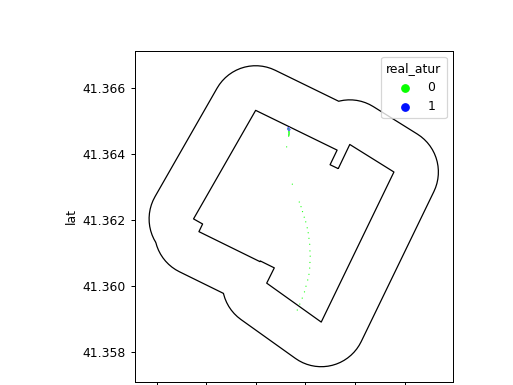

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [24]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


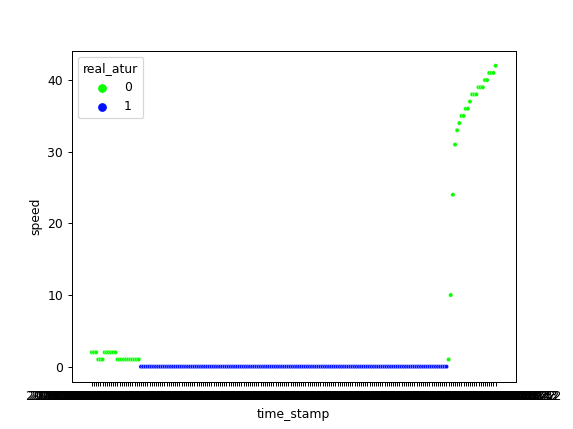

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [25]:
sns.scatterplot(data = dft, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

In [28]:
dft1 = dfA_n2.loc[6078:6538,:].copy()
dft1['real_atur'] = 0

In [29]:
len(dft1)

461

In [30]:
realparado(dft1)

               time_stamp       mmsi  status  turn  speed      lon       lat  \
6078  2022-06-03 10:12:48  247383500       0   0.0    1.0  2.17725  41.36457   
6079  2022-06-03 10:12:59  247383500       0  -4.0    1.0  2.17725  41.36458   
6080  2022-06-03 10:13:07  247383500       0   0.0    1.0  2.17725  41.36458   
6081  2022-06-03 10:13:19  247383500       0   6.0    1.0  2.17725  41.36459   
6082  2022-06-03 10:13:28  247383500       0   8.0    1.0  2.17726  41.36460   
...                   ...        ...     ...   ...    ...      ...       ...   
6534  2022-06-03 21:33:38  247383500       0  15.0   41.0  2.17806  41.35983   
6535  2022-06-03 21:33:41  247383500       0  15.0   41.0  2.17803  41.35977   
6536  2022-06-03 21:33:51  247383500       0  14.0   42.0  2.17796  41.35958   
6537  2022-06-03 21:34:01  247383500       0  10.0   41.0  2.17788  41.35940   
6538  2022-06-03 21:34:11  247383500       0   7.0   42.0  2.17779  41.35922   

      course  heading         day  ... 

<IPython.core.display.Javascript object>


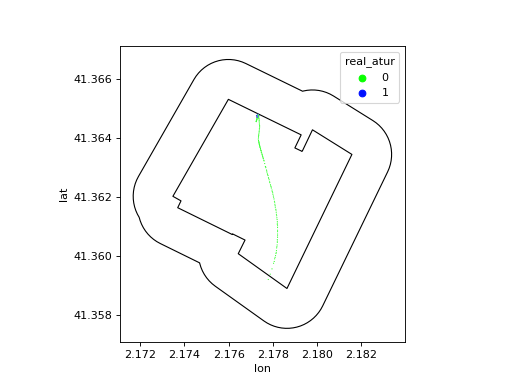

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [31]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft1, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


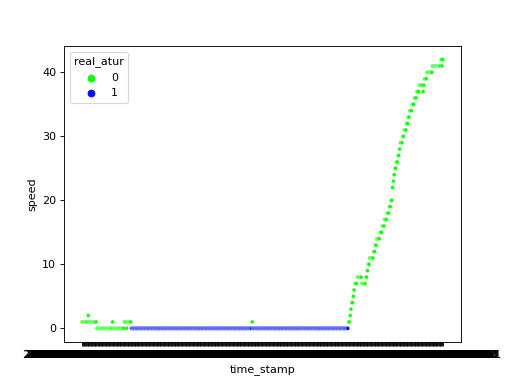

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [32]:
sns.scatterplot(data = dft1, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

               time_stamp       mmsi  status  turn  speed      lon       lat  \
6078  2022-06-03 10:12:48  247383500       0   0.0    1.0  2.17725  41.36457   
6079  2022-06-03 10:12:59  247383500       0  -4.0    1.0  2.17725  41.36458   
6080  2022-06-03 10:13:07  247383500       0   0.0    1.0  2.17725  41.36458   
6081  2022-06-03 10:13:19  247383500       0   6.0    1.0  2.17725  41.36459   
6082  2022-06-03 10:13:28  247383500       0   8.0    1.0  2.17726  41.36460   
...                   ...        ...     ...   ...    ...      ...       ...   
6534  2022-06-03 21:33:38  247383500       0  15.0   41.0  2.17806  41.35983   
6535  2022-06-03 21:33:41  247383500       0  15.0   41.0  2.17803  41.35977   
6536  2022-06-03 21:33:51  247383500       0  14.0   42.0  2.17796  41.35958   
6537  2022-06-03 21:34:01  247383500       0  10.0   41.0  2.17788  41.35940   
6538  2022-06-03 21:34:11  247383500       0   7.0   42.0  2.17779  41.35922   

      course  heading         day  ... 

<IPython.core.display.Javascript object>


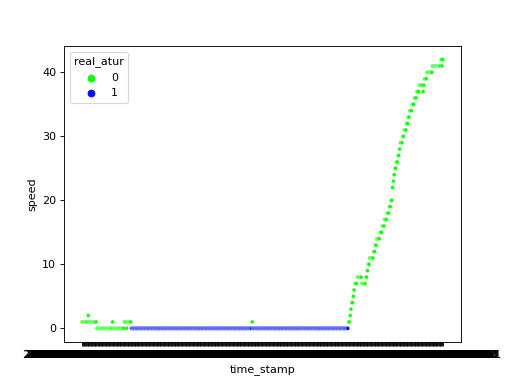

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [33]:
dft1111 = dfA_n2.loc[6078:6538,:].copy()
dft1111['real_atur'] = 0
realparado2(dft1111)

sns.scatterplot(data = dft1111, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

In [41]:
dft1111['test'] = medfilt(dft1111['real_atur'], kernel_size=3)
dft1111.loc[dft1111['real_atur']!=dft1111['test'],:]

In [46]:
len(dft1111['real_atur']) == len(dft1111['test'])

True

In [45]:
dft1111.loc[dft1111['real_atur']!=dft1111['test'],:]

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort,real_atur,test
6295,2022-06-03 15:37:12,247383500,5,0.0,1.0,2.17733,41.36478,6.3,115.0,2022-06-03,...,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0,1.0


<IPython.core.display.Javascript object>


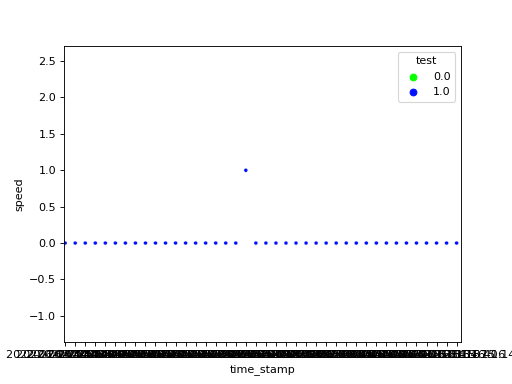

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [44]:
sns.scatterplot(data = dft1111, x = 'time_stamp',y = 'speed', s = 12, hue = 'test', palette = 'hsv')

In [37]:
dft1.loc[dft1['real_atur']!=dft1111['real_atur'],:]

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,draught,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort,real_atur


In [31]:
dft1

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,draught,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort,real_atur
6078,2022-06-03 10:12:48,247383500,0,0.0,1.0,2.17725,41.36457,345.3,118.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,NaN,ent,0
6079,2022-06-03 10:12:59,247383500,0,-4.0,1.0,2.17725,41.36458,345.3,118.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
6080,2022-06-03 10:13:07,247383500,0,0.0,1.0,2.17725,41.36458,345.3,118.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
6081,2022-06-03 10:13:19,247383500,0,6.0,1.0,2.17725,41.36459,345.3,118.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
6082,2022-06-03 10:13:28,247383500,0,8.0,1.0,2.17726,41.36460,345.3,119.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6534,2022-06-03 21:33:38,247383500,0,15.0,41.0,2.17806,41.35983,195.5,200.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,1,NaN,NaN,0
6535,2022-06-03 21:33:41,247383500,0,15.0,41.0,2.17803,41.35977,196.0,200.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,1,NaN,NaN,0
6536,2022-06-03 21:33:51,247383500,0,14.0,42.0,2.17796,41.35958,196.6,202.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,1,NaN,NaN,0
6537,2022-06-03 21:34:01,247383500,0,10.0,41.0,2.17788,41.35940,200.4,203.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,1,NaN,NaN,0


In [32]:
dft1[(dft1['aturat'] == dft1['real_atur'])]

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,draught,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort,real_atur
6143,2022-06-03 10:23:38,247383500,0,-1.0,0.0,2.17731,41.36476,6.3,116.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1
6144,2022-06-03 10:23:48,247383500,0,0.0,0.0,2.17731,41.36476,6.3,116.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1
6148,2022-06-03 10:24:28,247383500,0,0.0,0.0,2.17730,41.36475,6.3,116.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1
6149,2022-06-03 10:24:38,247383500,0,0.0,0.0,2.17730,41.36475,6.3,116.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1
6154,2022-06-03 10:25:28,247383500,0,0.0,0.0,2.17730,41.36474,6.3,116.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,2022-06-03 21:04:19,247383500,5,-1.0,0.0,2.17734,41.36476,6.3,115.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1
6404,2022-06-03 21:07:15,247383500,5,0.0,0.0,2.17732,41.36477,6.3,115.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1
6406,2022-06-03 21:13:18,247383500,5,0.0,0.0,2.17731,41.36479,6.3,115.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1
6407,2022-06-03 21:16:17,247383500,5,-1.0,0.0,2.17733,41.36476,6.3,115.0,2022-06-03,...,7.0,116.0,122.0,27.0,7.0,9859557,0,1.0,NaN,1


In [33]:
dft2 = dfA_n2.loc[11994:12193,:].copy()
dft2['real_atur']=0

In [34]:
realparado(dft2)

                time_stamp       mmsi  status  turn  speed      lon       lat  \
11994  2022-06-08 01:00:38  247383500       0 -10.0    4.0  2.17745  41.36450   
11995  2022-06-08 01:00:48  247383500       0  -8.0    3.0  2.17745  41.36451   
11996  2022-06-08 01:00:59  247383500       0  -5.0    2.0  2.17746  41.36453   
11997  2022-06-08 01:01:10  247383500       0  -3.0    2.0  2.17746  41.36454   
11998  2022-06-08 01:01:18  247383500       0  -2.0    2.0  2.17746  41.36455   
...                    ...        ...     ...   ...    ...      ...       ...   
12189  2022-06-08 04:42:57  247383500       5  14.0   41.0  2.17812  41.35997   
12190  2022-06-08 04:43:07  247383500       5  12.0   42.0  2.17804  41.35979   
12191  2022-06-08 04:43:16  247383500       5  11.0   42.0  2.17796  41.35963   
12192  2022-06-08 04:43:26  247383500       5  11.0   43.0  2.17786  41.35944   
12193  2022-06-08 04:43:38  247383500       5  10.0   44.0  2.17773  41.35921   

       course  heading     

<IPython.core.display.Javascript object>


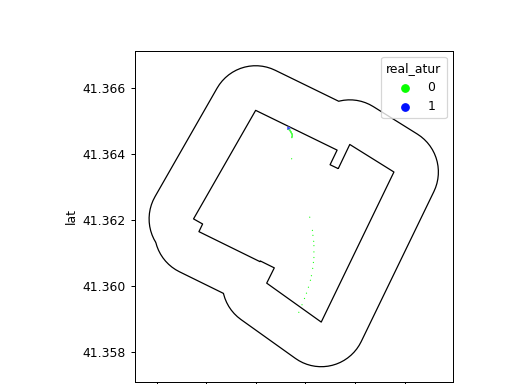

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [36]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft2, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


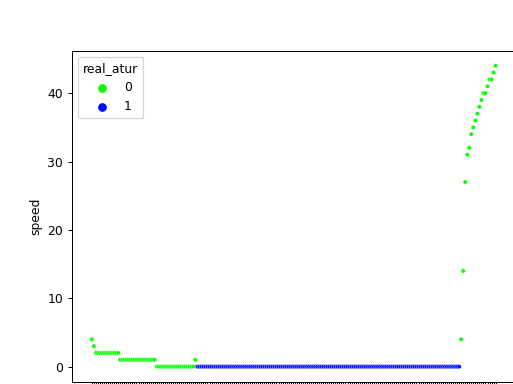

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [37]:
sns.scatterplot(data = dft2, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status  turn  speed      lon       lat  \
15592  2022-06-09 13:23:57  247383500       0  -8.0    4.0  2.17722  41.36459   
15593  2022-06-09 13:24:07  247383500       0  -9.0    4.0  2.17724  41.36460   
15594  2022-06-09 13:24:16  247383500       0  -8.0    3.0  2.17725  41.36462   
15595  2022-06-09 13:24:27  247383500       0  -7.0    3.0  2.17726  41.36463   
15596  2022-06-09 13:24:37  247383500       0  -7.0    3.0  2.17727  41.36465   
...                    ...        ...     ...   ...    ...      ...       ...   
15871  2022-06-09 19:48:01  247383500       0  16.0   49.0  2.17780  41.35974   
15872  2022-06-09 19:48:03  247383500       0  16.0   48.0  2.17778  41.35970   
15873  2022-06-09 19:48:06  247383500       0  15.0   48.0  2.17774  41.35964   
15874  2022-06-09 19:48:09  247383500       0  14.0   48.0  2.17771  41.35958   
15875  2022-06-09 19:48:17  247383500       0  13.0   48.0  2.17761  41.35941   

       course  heading     

<IPython.core.display.Javascript object>


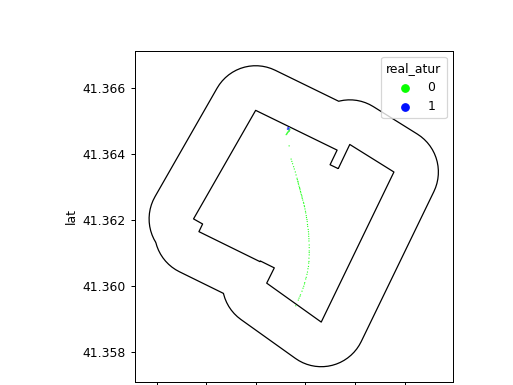

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [38]:
dft3 = dfA_n2.loc[15592:15875,:].copy()
dft3['real_atur']=0
realparado(dft3);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft3, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


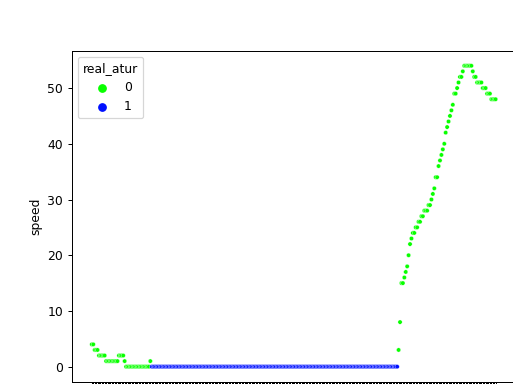

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [39]:
sns.scatterplot(data = dft3, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status  turn  speed      lon       lat  \
38562  2022-06-18 13:22:07  247383500       0   4.0    3.0  2.17724  41.36458   
38563  2022-06-18 13:22:17  247383500       0  -3.0    3.0  2.17725  41.36459   
38564  2022-06-18 13:22:26  247383500       0  -7.0    3.0  2.17727  41.36460   
38565  2022-06-18 13:22:37  247383500       0  -7.0    2.0  2.17728  41.36461   
38566  2022-06-18 13:22:46  247383500       0  -6.0    2.0  2.17729  41.36462   
...                    ...        ...     ...   ...    ...      ...       ...   
38828  2022-06-18 20:17:26  247383500       5  13.0   51.0  2.17811  41.36042   
38829  2022-06-18 20:17:35  247383500       5  12.0   53.0  2.17801  41.36022   
38830  2022-06-18 20:17:46  247383500       5  11.0   55.0  2.17789  41.35995   
38831  2022-06-18 20:17:57  247383500       5  10.0   58.0  2.17775  41.35967   
38832  2022-06-18 20:18:07  247383500       5  11.0   61.0  2.17761  41.35941   

       course  heading     

<IPython.core.display.Javascript object>


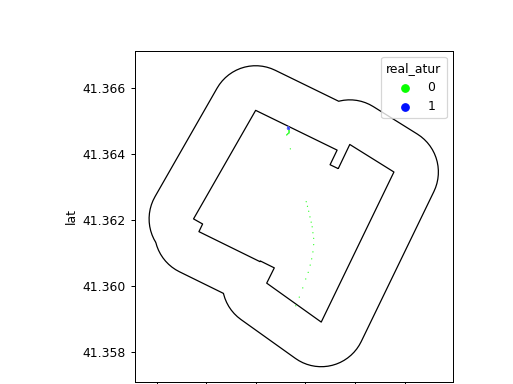

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [43]:
dft4 = dfA_n2.loc[38562:38832,:].copy()
dft4['real_atur']=0
realparado(dft4);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft4, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')



<IPython.core.display.Javascript object>


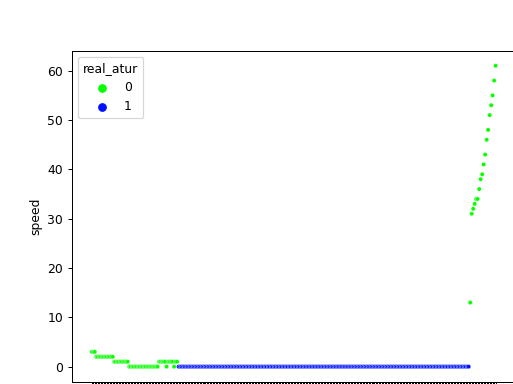

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [44]:
sns.scatterplot(data = dft4, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status  turn  speed      lon       lat  \
50238  2022-06-26 01:33:02  247383500       0  -4.0    2.0  2.17732  41.36457   
50239  2022-06-26 01:33:11  247383500       0  -2.0    2.0  2.17733  41.36458   
50240  2022-06-26 01:33:21  247383500       0  -3.0    2.0  2.17733  41.36459   
50241  2022-06-26 01:33:31  247383500       0  -3.0    1.0  2.17733  41.36460   
50242  2022-06-26 01:33:41  247383500       0  -4.0    1.0  2.17733  41.36461   
...                    ...        ...     ...   ...    ...      ...       ...   
50495  2022-06-26 08:18:59  247383500       5  16.0   35.0  2.17780  41.36015   
50496  2022-06-26 08:19:08  247383500       5  14.0   35.0  2.17775  41.36000   
50497  2022-06-26 08:19:17  247383500       5  12.0   36.0  2.17770  41.35986   
50498  2022-06-26 08:19:28  247383500       5   9.0   37.0  2.17761  41.35968   
50499  2022-06-26 08:19:39  247383500       5   9.0   38.0  2.17752  41.35950   

       course  heading     

<IPython.core.display.Javascript object>


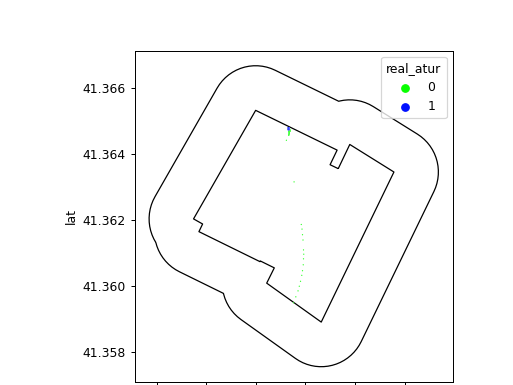

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [46]:
dft5 = dfA_n2.loc[50238:50499,:].copy()
dft5['real_atur']=0
realparado(dft5);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft5, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


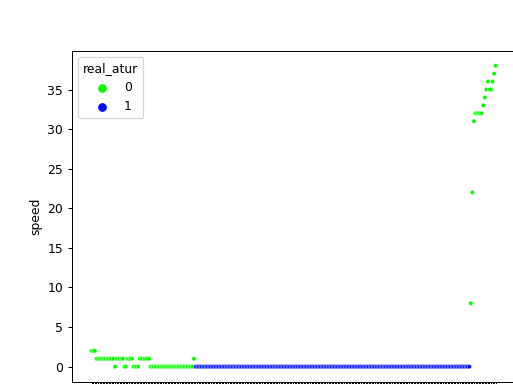

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [48]:
sns.scatterplot(data = dft5, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status  turn  speed      lon       lat  \
56708  2022-06-30 07:28:58  247383500       0  -2.0    1.0  2.17723  41.36458   
56709  2022-06-30 07:29:08  247383500       0   2.0    1.0  2.17724  41.36458   
56710  2022-06-30 07:29:18  247383500       0   6.0    1.0  2.17725  41.36457   
56711  2022-06-30 07:29:28  247383500       0   5.0    1.0  2.17726  41.36456   
56712  2022-06-30 07:29:39  247383500       0   4.0    1.0  2.17727  41.36456   
...                    ...        ...     ...   ...    ...      ...       ...   
57069  2022-06-30 14:47:26  247383500       5  18.0   56.0  2.17792  41.36035   
57070  2022-06-30 14:47:36  247383500       5  19.0   58.0  2.17786  41.36008   
57071  2022-06-30 14:47:46  247383500       5  19.0   60.0  2.17779  41.35981   
57072  2022-06-30 14:47:55  247383500       5  16.0   61.0  2.17769  41.35954   
57073  2022-06-30 14:48:06  247383500       5  14.0   59.0  2.17758  41.35928   

       course  heading     

<IPython.core.display.Javascript object>


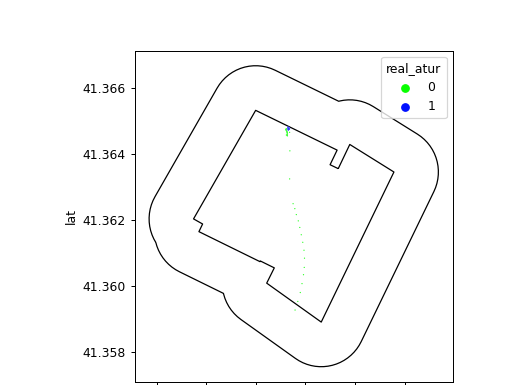

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [49]:
dft6 = dfA_n2.loc[56708:57073,:].copy()
dft6['real_atur']=0
realparado(dft6);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft6, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


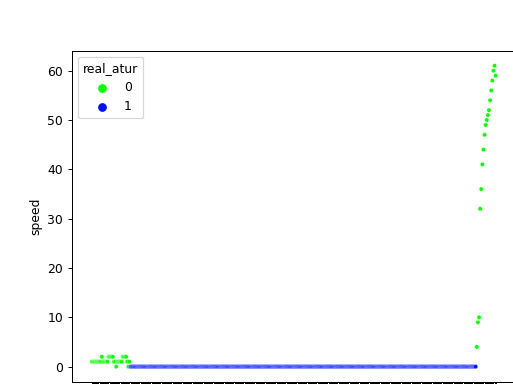

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [50]:
sns.scatterplot(data = dft6, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

# 247383600

In [24]:
dfAmmsi = dfA_n2.groupby('mmsi')

In [23]:
dfA1b1=dfAmmsi.get_group(247383600).copy()

               time_stamp       mmsi  status  turn  speed      lon       lat  \
683   2022-06-01 07:05:46  247383600       0  -4.0    3.0  2.17728  41.36456   
684   2022-06-01 07:05:55  247383600       0  -6.0    3.0  2.17727  41.36457   
685   2022-06-01 07:06:05  247383600       0  -7.0    4.0  2.17727  41.36459   
686   2022-06-01 07:06:16  247383600       0  -7.0    4.0  2.17727  41.36461   
687   2022-06-01 07:06:26  247383600       0  -5.0    4.0  2.17727  41.36462   
...                   ...        ...     ...   ...    ...      ...       ...   
2610  2022-06-02 00:15:45  247383600       5   6.0   35.0  2.17801  41.36009   
2611  2022-06-02 00:15:55  247383600       5   9.0   37.0  2.17794  41.35993   
2612  2022-06-02 00:16:05  247383600       5  10.0   39.0  2.17785  41.35977   
2613  2022-06-02 00:16:16  247383600       5   6.0   41.0  2.17775  41.35957   
2614  2022-06-02 00:16:25  247383600       5   3.0   42.0  2.17766  41.35941   

      course  heading         day  ... 

<IPython.core.display.Javascript object>


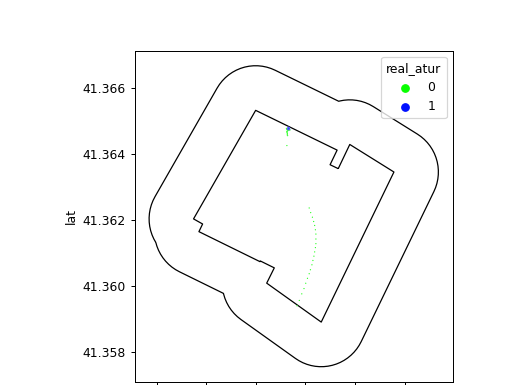

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [24]:
dft7 = dfA1b1.loc[683:2614,:].copy()
dft7['real_atur']=0
realparado(dft7);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft7, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


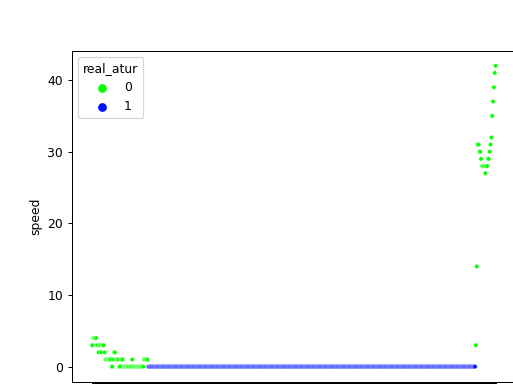

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [25]:
sns.scatterplot(data = dft7, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


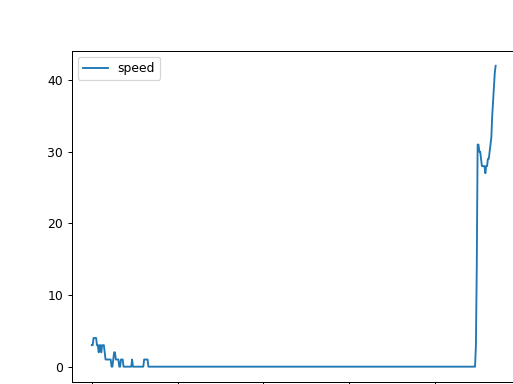

<AxesSubplot:xlabel='time_stamp'>

In [26]:
dft7.loc[683:2614,:].plot(kind='line', x='time_stamp', y='speed')

                time_stamp       mmsi  status  turn  speed      lon       lat  \
20292  2022-06-11 13:39:45  247383600       0  13.0    4.0  2.17726  41.36458   
20293  2022-06-11 13:39:56  247383600       0  10.0    3.0  2.17729  41.36459   
20294  2022-06-11 13:40:06  247383600       0   4.0    3.0  2.17730  41.36460   
20295  2022-06-11 13:40:16  247383600       0  -7.0    3.0  2.17732  41.36462   
20296  2022-06-11 13:40:27  247383600       0 -10.0    3.0  2.17733  41.36463   
...                    ...        ...     ...   ...    ...      ...       ...   
20543  2022-06-11 18:26:31  247383600       0  11.0   45.0  2.17777  41.36035   
20544  2022-06-11 18:26:40  247383600       0  12.0   46.0  2.17767  41.36017   
20545  2022-06-11 18:26:51  247383600       0  11.0   46.0  2.17754  41.35996   
20546  2022-06-11 18:27:00  247383600       0   7.0   46.0  2.17743  41.35979   
20547  2022-06-11 18:27:11  247383600       0   4.0   46.0  2.17730  41.35959   

       course  heading     

<IPython.core.display.Javascript object>


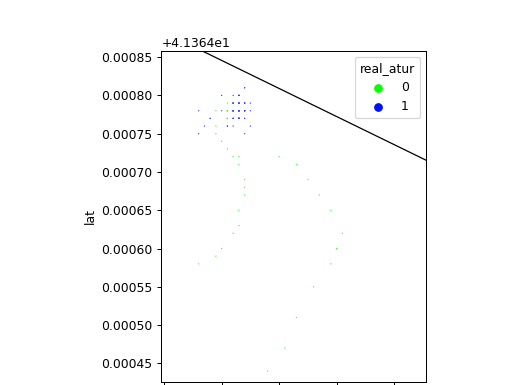

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [27]:
dft8 = dfA1b1.loc[20292:20547,:].copy()
dft8['real_atur']=0
realparado(dft8);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft8, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


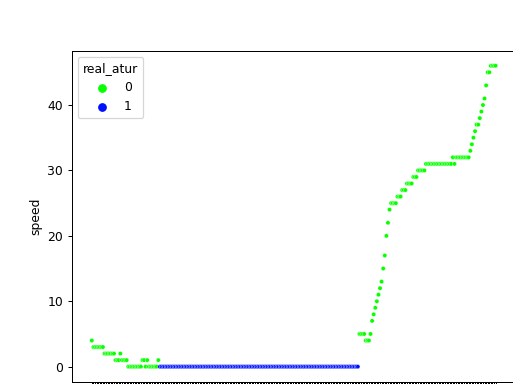

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [28]:
sns.scatterplot(data = dft8, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status  turn  speed      lon       lat  \
37342  2022-06-17 01:18:47  247383600       0  -6.0    5.0  2.17730  41.36455   
37343  2022-06-17 01:18:58  247383600       0  -5.0    5.0  2.17730  41.36458   
37344  2022-06-17 01:19:07  247383600       0  -5.0    5.0  2.17730  41.36460   
37345  2022-06-17 01:19:17  247383600       0  -4.0    4.0  2.17730  41.36462   
37346  2022-06-17 01:19:27  247383600       0  -5.0    4.0  2.17729  41.36465   
...                    ...        ...     ...   ...    ...      ...       ...   
37630  2022-06-17 06:14:17  247383600       0  11.0   40.0  2.17783  41.36042   
37631  2022-06-17 06:14:27  247383600       0   4.0   45.0  2.17774  41.36024   
37632  2022-06-17 06:14:37  247383600       0  -1.0   50.0  2.17762  41.36004   
37633  2022-06-17 06:14:47  247383600       0  13.0   55.0  2.17749  41.35981   
37634  2022-06-17 06:14:57  247383600       0   8.0   60.0  2.17735  41.35956   

       course  heading     

<IPython.core.display.Javascript object>


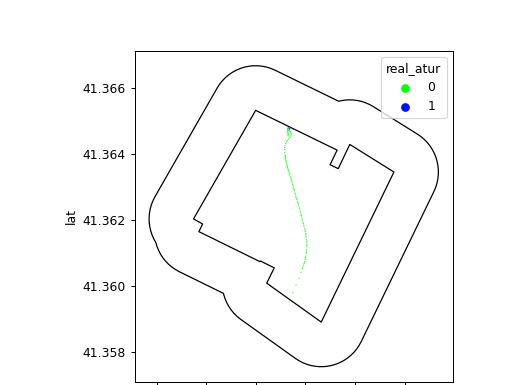

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [29]:
dft9 = dfA1b1.loc[37342:37634,:].copy()
dft9['real_atur']=0
realparado(dft9);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft9, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


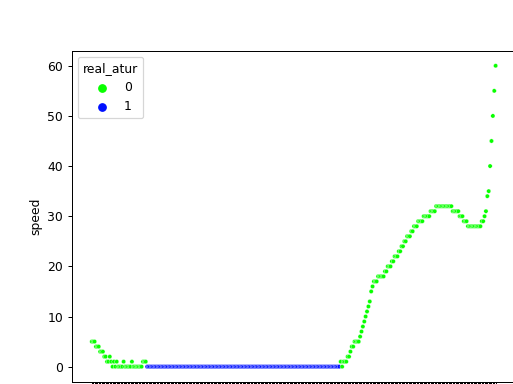

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [31]:
sns.scatterplot(data = dft9, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status  turn  speed      lon       lat  \
39397  2022-06-18 21:46:57  247383600       0  -8.0    2.0  2.17720  41.36460   
39398  2022-06-18 21:47:07  247383600       0  -6.0    1.0  2.17719  41.36461   
39399  2022-06-18 21:47:17  247383600       0   7.0    2.0  2.17720  41.36461   
39400  2022-06-18 21:47:26  247383600       0   9.0    2.0  2.17722  41.36462   
39401  2022-06-18 21:47:36  247383600       0   8.0    1.0  2.17723  41.36462   
...                    ...        ...     ...   ...    ...      ...       ...   
39553  2022-06-19 00:42:48  247383600       0  15.0   57.0  2.17790  41.36008   
39554  2022-06-19 00:42:51  247383600       0  15.0   57.0  2.17787  41.36004   
39555  2022-06-19 00:43:02  247383600       0  12.0   56.0  2.17771  41.35974   
39556  2022-06-19 00:43:11  247383600       0  10.0   56.0  2.17759  41.35955   
39557  2022-06-19 00:43:22  247383600       0   6.0   55.0  2.17741  41.35927   

       course  heading     

<IPython.core.display.Javascript object>


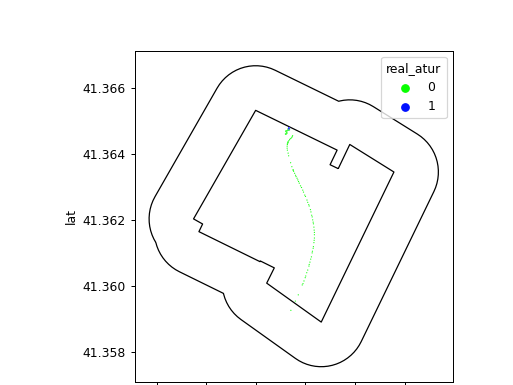

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [32]:
dft10 = dfA1b1.loc[39397:39557,:].copy()
dft10['real_atur']=0
realparado(dft10);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft10, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


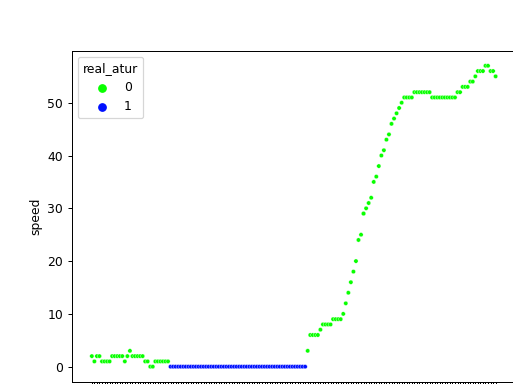

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [33]:
sns.scatterplot(data = dft10, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

# 247219400 INTERESANTE

In [49]:
dfA1b2=dfAmmsi.get_group(247219400).copy()

                time_stamp       mmsi  status   turn  speed      lon  \
21990  2022-06-12 21:40:20  247219400       0    0.0    4.0  2.17528   
21991  2022-06-12 21:40:30  247219400       0    0.0    4.0  2.17528   
21992  2022-06-12 21:40:39  247219400       0    0.0    4.0  2.17527   
21993  2022-06-12 21:40:50  247219400       0    0.0    4.0  2.17525   
21994  2022-06-12 21:41:00  247219400       0    0.0    2.0  2.17525   
...                    ...        ...     ...    ...    ...      ...   
30434  2022-06-13 21:29:22  247219400       0  127.0   54.0  2.17776   
30435  2022-06-13 21:29:24  247219400       0  127.0   54.0  2.17773   
30436  2022-06-13 21:29:31  247219400       0  127.0   56.0  2.17763   
30437  2022-06-13 21:29:38  247219400       0  127.0   57.0  2.17753   
30438  2022-06-13 21:29:40  247219400       0    0.0   60.0  2.17749   

            lat  course  heading         day  ... draught  to_bow  to_stern  \
21990  41.36387   281.9     26.0  2022-06-12  ...     6.

<IPython.core.display.Javascript object>


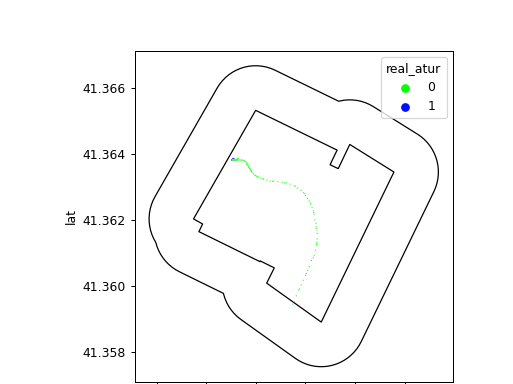

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [40]:
dft11 = dfA1b2.loc[21990:30438,:].copy()
dft11['real_atur']=0
realparado1(dft11);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft11, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


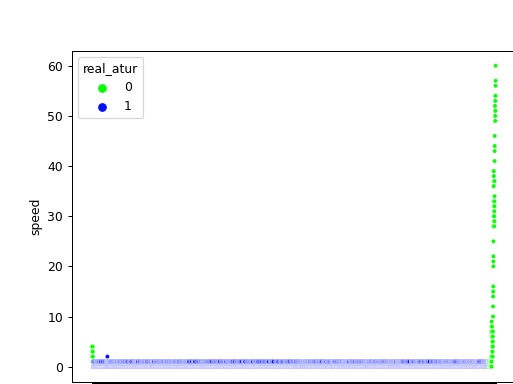

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [38]:
sns.scatterplot(data = dft11, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status   turn  speed      lon  \
21990  2022-06-12 21:40:20  247219400       0    0.0    4.0  2.17528   
21991  2022-06-12 21:40:30  247219400       0    0.0    4.0  2.17528   
21992  2022-06-12 21:40:39  247219400       0    0.0    4.0  2.17527   
21993  2022-06-12 21:40:50  247219400       0    0.0    4.0  2.17525   
21994  2022-06-12 21:41:00  247219400       0    0.0    2.0  2.17525   
...                    ...        ...     ...    ...    ...      ...   
30434  2022-06-13 21:29:22  247219400       0  127.0   54.0  2.17776   
30435  2022-06-13 21:29:24  247219400       0  127.0   54.0  2.17773   
30436  2022-06-13 21:29:31  247219400       0  127.0   56.0  2.17763   
30437  2022-06-13 21:29:38  247219400       0  127.0   57.0  2.17753   
30438  2022-06-13 21:29:40  247219400       0    0.0   60.0  2.17749   

            lat  course  heading         day  ... draught  to_bow  to_stern  \
21990  41.36387   281.9     26.0  2022-06-12  ...     6.

<IPython.core.display.Javascript object>


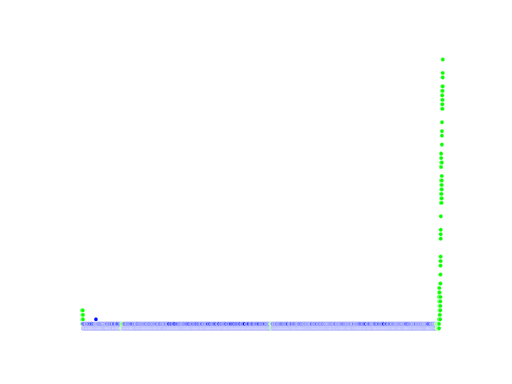

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [50]:
dft111 = dfA1b2.loc[21990:30438,:].copy()
dft111['real_atur']=0
realparado2(dft111);

sns.scatterplot(data = dft111, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

In [58]:
dft111['test'] = medfilt(dft111['real_atur'], kernel_size=53)
dft111.loc[dft111['real_atur']!=dft111['test'],:]

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort,real_atur,test
22735,2022-06-12 23:48:21,247219400,0,0.0,1.0,2.17508,41.36383,209.0,29.0,2022-06-12,...,20.0,234.0,15.0,15.0,9351476,0,NaN,NaN,0,1.0
23272,2022-06-13 01:20:32,247219400,0,0.0,1.0,2.17507,41.36383,29.0,29.0,2022-06-13,...,20.0,234.0,15.0,15.0,9351476,0,NaN,NaN,0,1.0
23273,2022-06-13 01:20:41,247219400,0,0.0,1.0,2.17507,41.36383,119.0,29.0,2022-06-13,...,20.0,234.0,15.0,15.0,9351476,0,NaN,NaN,0,1.0
29754,2022-06-13 19:37:41,247219400,0,0.0,1.0,2.17508,41.36383,29.0,29.0,2022-06-13,...,20.0,234.0,15.0,15.0,9351476,0,NaN,NaN,0,1.0
29886,2022-06-13 20:00:41,247219400,0,0.0,1.0,2.17508,41.36385,29.0,29.0,2022-06-13,...,20.0,234.0,15.0,15.0,9351476,0,NaN,NaN,0,1.0
30055,2022-06-13 20:29:42,247219400,0,0.0,1.0,2.17510,41.36385,209.0,29.0,2022-06-13,...,20.0,234.0,15.0,15.0,9351476,0,NaN,NaN,0,1.0


In [62]:
dft111['speed_window'] = dft111['speed'].rolling(window=4).mean()

<IPython.core.display.Javascript object>


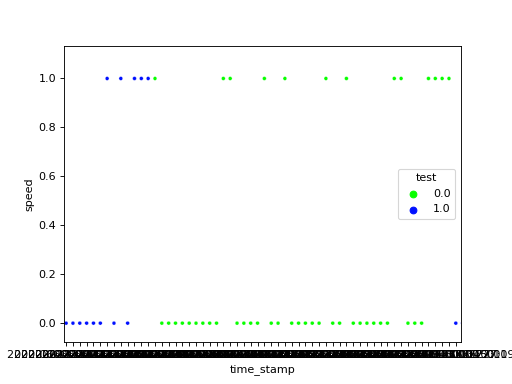

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [60]:
sns.scatterplot(data = dft111, x = 'time_stamp',y = 'speed', s = 12, hue = 'test', palette = 'hsv')

<IPython.core.display.Javascript object>


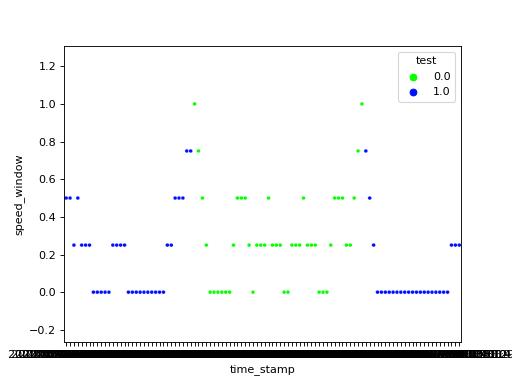

<AxesSubplot:xlabel='time_stamp', ylabel='speed_window'>

In [63]:
sns.scatterplot(data = dft111, x = 'time_stamp',y = 'speed_window', s = 12, hue = 'test', palette = 'hsv')

               time_stamp       mmsi  status  turn  speed      lon       lat  \
1213  2022-06-01 21:54:37  247219400       0   0.0    6.0  2.17530  41.36388   
1214  2022-06-01 21:54:57  247219400       0   0.0    2.0  2.17523  41.36388   
1215  2022-06-01 21:55:07  247219400       0   0.0    4.0  2.17522  41.36387   
1216  2022-06-01 21:55:17  247219400       0   0.0    3.0  2.17520  41.36387   
1217  2022-06-01 21:55:27  247219400       0   0.0    3.0  2.17518  41.36387   
...                   ...        ...     ...   ...    ...      ...       ...   
2578  2022-06-02 01:38:33  247219400       0   0.0   57.0  2.17768  41.35989   
2579  2022-06-02 01:38:37  247219400       0   0.0   58.0  2.17761  41.35977   
2580  2022-06-02 01:38:39  247219400       0   0.0   60.0  2.17758  41.35972   
2581  2022-06-02 01:38:43  247219400       0   0.0   61.0  2.17753  41.35960   
2582  2022-06-02 01:38:47  247219400       0   0.0   61.0  2.17747  41.35950   

      course  heading         day  ... 

<IPython.core.display.Javascript object>


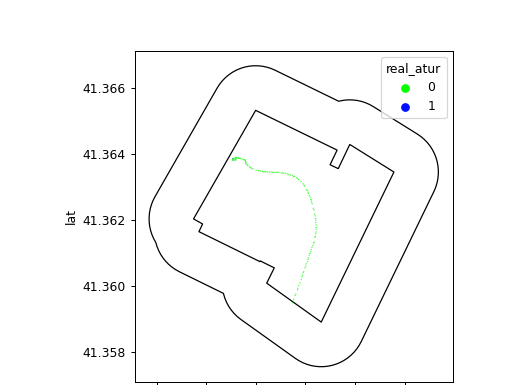

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [43]:
dft12 = dfA1b2.loc[1213:2582,:].copy()
dft12['real_atur']=0
realparado1(dft12);

fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft12, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


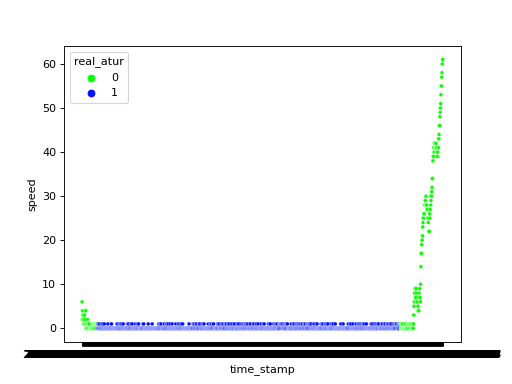

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [44]:
sns.scatterplot(data = dft12, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

               time_stamp       mmsi  status   turn  speed      lon       lat  \
6647  2022-06-03 21:07:20  247219400       0    0.0    6.0  2.17531  41.36392   
6648  2022-06-03 21:07:29  247219400       0    0.0    6.0  2.17528  41.36392   
6649  2022-06-03 21:07:39  247219400       0    0.0    6.0  2.17525  41.36390   
6650  2022-06-03 21:07:50  247219400       0    0.0    6.0  2.17522  41.36388   
6651  2022-06-03 21:07:59  247219400       0    0.0    7.0  2.17518  41.36388   
...                   ...        ...     ...    ...    ...      ...       ...   
7235  2022-06-04 00:55:19  247219400       0  127.0   57.0  2.17785  41.36014   
7236  2022-06-04 00:55:25  247219400       0    0.0   61.0  2.17778  41.35999   
7237  2022-06-04 00:55:32  247219400       0    0.0   64.0  2.17768  41.35979   
7238  2022-06-04 00:55:35  247219400       0    0.0   64.0  2.17764  41.35970   
7239  2022-06-04 00:55:46  247219400       0    0.0   65.0  2.17749  41.35942   

      course  heading      

<IPython.core.display.Javascript object>


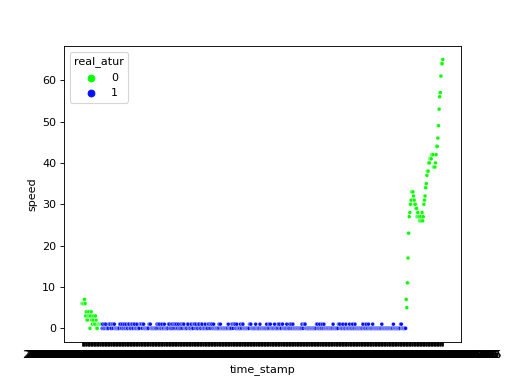

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [45]:
dft13 = dfA1b2.loc[6647:7239,:].copy()
dft13['real_atur']=0
realparado1(dft13);

sns.scatterplot(data = dft13, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

               time_stamp       mmsi  status   turn  speed      lon       lat  \
8781  2022-06-05 21:45:01  247219400       0    0.0    4.0  2.17525  41.36383   
8782  2022-06-05 21:45:11  247219400       0    0.0    1.0  2.17525  41.36383   
8783  2022-06-05 21:45:21  247219400       0    0.0    1.0  2.17523  41.36383   
8784  2022-06-05 21:45:32  247219400       0    0.0    2.0  2.17523  41.36383   
8785  2022-06-05 21:45:42  247219400       0    0.0    2.0  2.17522  41.36382   
...                   ...        ...     ...    ...    ...      ...       ...   
9489  2022-06-06 22:15:24  247219400       0  127.0   58.0  2.17777  41.35978   
9490  2022-06-06 22:15:29  247219400       0  127.0   60.0  2.17770  41.35965   
9491  2022-06-06 22:15:32  247219400       0    0.0   61.0  2.17765  41.35958   
9492  2022-06-06 22:15:36  247219400       0    0.0   62.0  2.17760  41.35947   
9493  2022-06-06 22:15:37  247219400       0    0.0   63.0  2.17758  41.35943   

      course  heading      

<IPython.core.display.Javascript object>


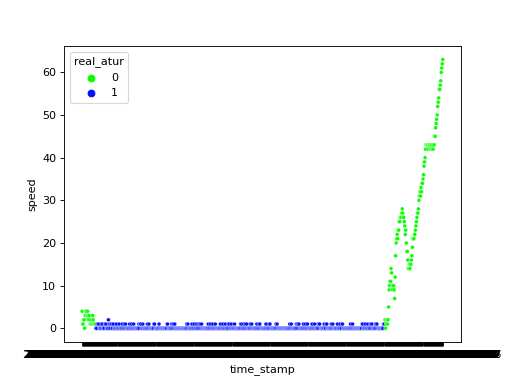

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [46]:
dft14 = dfA1b2.loc[8781:9493,:].copy()
dft14['real_atur']=0
realparado1(dft14);

sns.scatterplot(data = dft14, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status   turn  speed      lon  \
14434  2022-06-08 20:30:55  247219400       0    0.0    7.0  2.17526   
14435  2022-06-08 20:31:06  247219400       0    0.0    4.0  2.17523   
14436  2022-06-08 20:31:16  247219400       0    0.0    3.0  2.17522   
14437  2022-06-08 20:31:26  247219400       0    0.0    3.0  2.17520   
14438  2022-06-08 20:31:35  247219400       0    0.0    1.0  2.17518   
...                    ...        ...     ...    ...    ...      ...   
14665  2022-06-08 23:49:02  247219400       0  127.0   60.0  2.17782   
14666  2022-06-08 23:49:05  247219400       0  127.0   61.0  2.17781   
14667  2022-06-08 23:49:10  247219400       0  127.0   63.0  2.17771   
14668  2022-06-08 23:49:12  247219400       0  127.0   64.0  2.17767   
14669  2022-06-08 23:49:16  247219400       0  127.0   66.0  2.17760   

            lat  course  heading         day  ... draught  to_bow  to_stern  \
14434  41.36383   272.4     29.0  2022-06-08  ...     6.

<IPython.core.display.Javascript object>


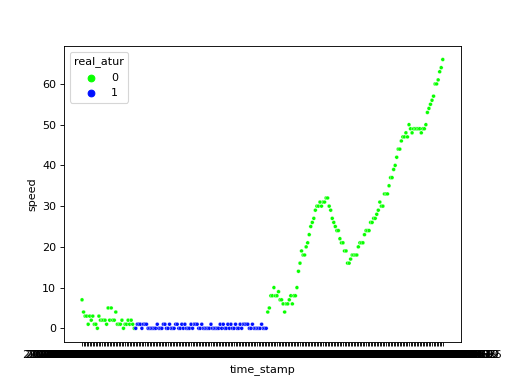

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [48]:
dft15 = dfA1b2.loc[14434:14669,:].copy()
dft15['real_atur']=0
realparado1(dft15);

sns.scatterplot(data = dft15, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

<IPython.core.display.Javascript object>


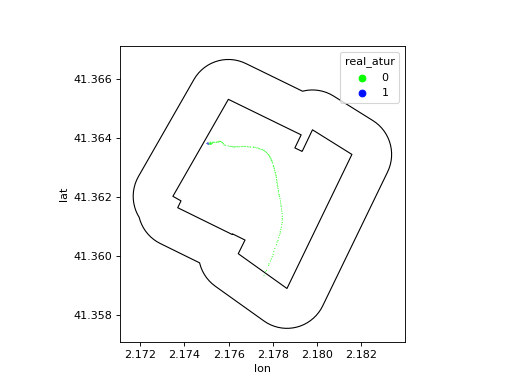

<AxesSubplot:xlabel='lon', ylabel='lat'>

In [49]:
fig, ax = plt.subplots()
dm_buffer_z2.plot(ax = ax, fc = 'none', ec = 'black')
dm_map.plot(ax = ax, fc = 'none', ec = 'black')
sns.scatterplot(data = dft15, x = 'lon',y = 'lat', s = 1, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status   turn  speed      lon  \
38053  2022-06-18 02:03:57  247219400       0    0.0    6.0  2.17531   
38054  2022-06-18 02:04:07  247219400       0    0.0    6.0  2.17528   
38055  2022-06-18 02:04:16  247219400       0    0.0    6.0  2.17525   
38056  2022-06-18 02:04:27  247219400       0    0.0    4.0  2.17523   
38057  2022-06-18 02:04:37  247219400       0    0.0    4.0  2.17520   
...                    ...        ...     ...    ...    ...      ...   
38293  2022-06-18 06:36:02  247219400       0  127.0   61.0  2.17767   
38294  2022-06-18 06:36:04  247219400       0  127.0   61.0  2.17764   
38295  2022-06-18 06:36:08  247219400       0  127.0   62.0  2.17759   
38296  2022-06-18 06:36:11  247219400       0  127.0   63.0  2.17754   
38297  2022-06-18 06:36:16  247219400       0    0.0   63.0  2.17746   

            lat  course  heading         day  ... draught  to_bow  to_stern  \
38053  41.36390   267.0     28.0  2022-06-18  ...     6.

<IPython.core.display.Javascript object>


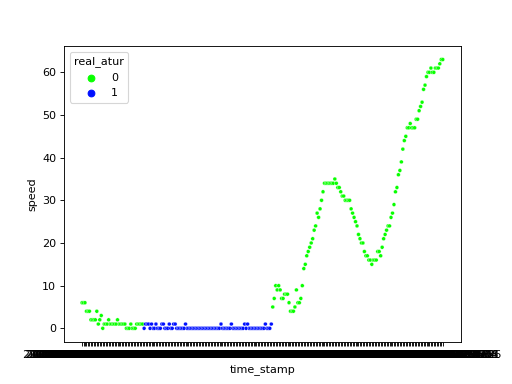

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [50]:
dft16 = dfA1b2.loc[38053:38297,:].copy()
dft16['real_atur']=0
realparado1(dft16);

sns.scatterplot(data = dft16, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

                time_stamp       mmsi  status   turn  speed      lon  \
50623  2022-06-26 22:22:45  247219400       0    0.0    3.0  2.17527   
50624  2022-06-26 22:22:55  247219400       0    0.0    4.0  2.17525   
50625  2022-06-26 22:23:05  247219400       0    0.0    4.0  2.17523   
50626  2022-06-26 22:23:15  247219400       0    0.0    1.0  2.17522   
50627  2022-06-26 22:23:26  247219400       0    0.0    2.0  2.17520   
...                    ...        ...     ...    ...    ...      ...   
51222  2022-06-27 22:03:10  247219400       0  127.0   50.0  2.17781   
51223  2022-06-27 22:03:14  247219400       0  127.0   50.0  2.17778   
51224  2022-06-27 22:03:17  247219400       0  127.0   51.0  2.17774   
51225  2022-06-27 22:03:19  247219400       0  127.0   52.0  2.17771   
51226  2022-06-27 22:03:24  247219400       0  127.0   54.0  2.17766   

            lat  course  heading         day  ... draught  to_bow  to_stern  \
50623  41.36385   282.5     31.0  2022-06-26  ...     6.

<IPython.core.display.Javascript object>


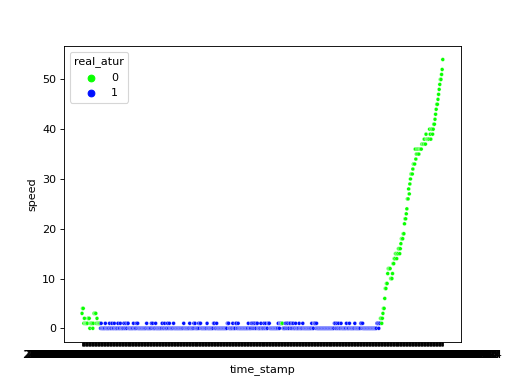

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [64]:
dft17 = dfA1b2.loc[50623:51226,:].copy()
dft17['real_atur']=0
realparado1(dft17);

sns.scatterplot(data = dft17, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

In [69]:
dft17['test'] = medfilt(dft17['real_atur'], kernel_size=33)
dft17.loc[dft17['real_atur']!=dft17['test'],:]

,time_stamp,mmsi,status,turn,speed,lon,lat,course,heading,day,...,to_bow,to_stern,to_starboard,to_port,imo,zone,aturat,entsort,real_atur,test
50957,2022-06-27 13:29:27,247219400,5,0.0,1.0,2.17505,41.36385,29.0,29.0,2022-06-27,...,20.0,234.0,15.0,15.0,9351476,0,NaN,NaN,0,1.0
50958,2022-06-27 13:32:29,247219400,5,0.0,1.0,2.17505,41.36385,29.0,29.0,2022-06-27,...,20.0,234.0,15.0,15.0,9351476,0,NaN,NaN,0,1.0


<IPython.core.display.Javascript object>


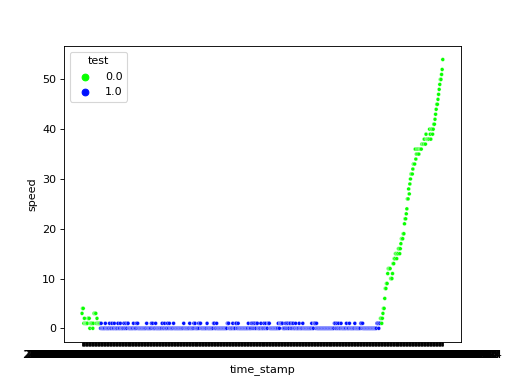

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [68]:
sns.scatterplot(data = dft17, x = 'time_stamp',y = 'speed', s = 12, hue = 'test', palette = 'hsv')

                time_stamp       mmsi  status   turn  speed      lon  \
56306  2022-06-29 19:09:33  247219400       5    0.0    3.0  2.17527   
56307  2022-06-29 19:09:44  247219400       5    0.0    3.0  2.17525   
56308  2022-06-29 19:09:53  247219400       5    0.0    2.0  2.17523   
56309  2022-06-29 19:10:03  247219400       5    0.0    2.0  2.17522   
56310  2022-06-29 19:10:13  247219400       5    0.0    1.0  2.17520   
...                    ...        ...     ...    ...    ...      ...   
56451  2022-06-29 23:18:49  247219400       0  127.0   53.0  2.17815   
56452  2022-06-29 23:18:59  247219400       0  127.0   53.0  2.17805   
56453  2022-06-29 23:19:08  247219400       0  127.0   53.0  2.17793   
56454  2022-06-29 23:19:18  247219400       0  127.0   53.0  2.17780   
56455  2022-06-29 23:19:28  247219400       0  127.0   53.0  2.17766   

            lat  course  heading         day  ... draught  to_bow  to_stern  \
56306  41.36385   257.0     32.0  2022-06-29  ...     7.

<IPython.core.display.Javascript object>


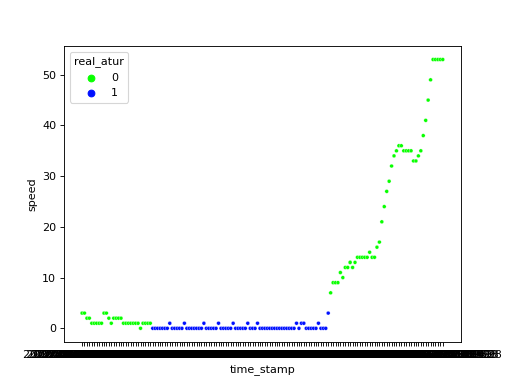

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [54]:
dft18 = dfA1b2.loc[56306:56455,:].copy()
dft18['real_atur']=0
realparado1(dft18);

sns.scatterplot(data = dft18, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

# 247383400 CON ROLLING WINDOW

In [25]:
dfA1b3=dfAmmsi.get_group(247383400).copy()

               time_stamp       mmsi  status  turn  speed      lon       lat  \
2898  2022-06-02 07:54:13  247383400       0   6.0    0.0  2.17740  41.36452   
2899  2022-06-02 07:54:24  247383400       0   3.0    0.0  2.17740  41.36452   
2900  2022-06-02 07:54:33  247383400       0   0.0    1.0  2.17740  41.36452   
2901  2022-06-02 07:54:42  247383400       0  -4.0    1.0  2.17739  41.36453   
2902  2022-06-02 07:54:53  247383400       0  -4.0    2.0  2.17738  41.36454   
...                   ...        ...     ...   ...    ...      ...       ...   
5121  2022-06-02 14:03:12  247383400       0  13.0   42.0  2.17804  41.35995   
5122  2022-06-02 14:03:23  247383400       0  10.0   41.0  2.17795  41.35974   
5123  2022-06-02 14:03:33  247383400       0   8.0   41.0  2.17787  41.35956   
5124  2022-06-02 14:03:42  247383400       0   7.0   41.0  2.17780  41.35940   
5125  2022-06-02 14:03:53  247383400       0   7.0   41.0  2.17771  41.35921   

      course  heading         day  ... 

<IPython.core.display.Javascript object>


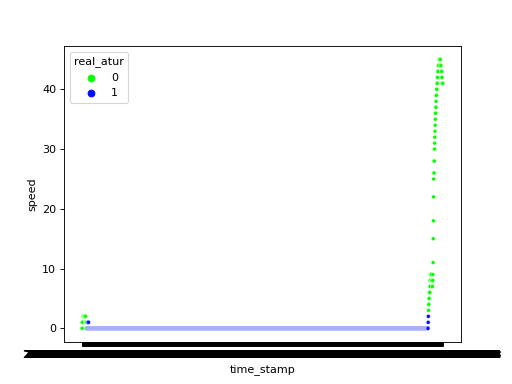

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [57]:
dft19 = dfA1b3.loc[2898:5125,:].copy()
dft19['real_atur']=0
realparado1(dft19);

sns.scatterplot(data = dft19, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

               time_stamp       mmsi  status  turn  speed      lon       lat  \
2898  2022-06-02 07:54:13  247383400       0   6.0    0.0  2.17740  41.36452   
2899  2022-06-02 07:54:24  247383400       0   3.0    0.0  2.17740  41.36452   
2900  2022-06-02 07:54:33  247383400       0   0.0    1.0  2.17740  41.36452   
2901  2022-06-02 07:54:42  247383400       0  -4.0    1.0  2.17739  41.36453   
2902  2022-06-02 07:54:53  247383400       0  -4.0    2.0  2.17738  41.36454   
...                   ...        ...     ...   ...    ...      ...       ...   
5121  2022-06-02 14:03:12  247383400       0  13.0   42.0  2.17804  41.35995   
5122  2022-06-02 14:03:23  247383400       0  10.0   41.0  2.17795  41.35974   
5123  2022-06-02 14:03:33  247383400       0   8.0   41.0  2.17787  41.35956   
5124  2022-06-02 14:03:42  247383400       0   7.0   41.0  2.17780  41.35940   
5125  2022-06-02 14:03:53  247383400       0   7.0   41.0  2.17771  41.35921   

      course  heading         day  ... 

<IPython.core.display.Javascript object>


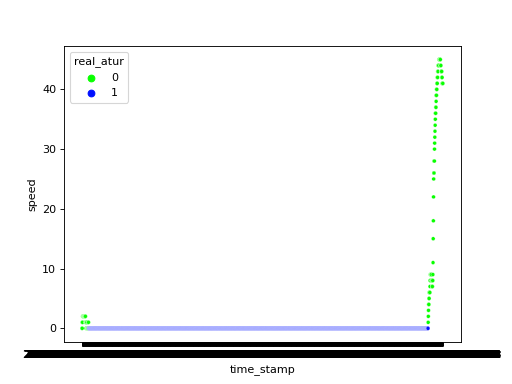

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [27]:
dft19 = dfA1b3.loc[2898:5125,:].copy()
dft19['real_atur']=0
realparado2(dft19);

sns.scatterplot(data = dft19, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

               time_stamp       mmsi  status  turn  speed      lon       lat  \
7906  2022-06-04 20:56:26  247383400       0  -7.0    2.0  2.17733  41.36454   
7907  2022-06-04 20:56:36  247383400       0  -4.0    1.0  2.17733  41.36455   
7908  2022-06-04 20:56:45  247383400       0   0.0    1.0  2.17734  41.36455   
7909  2022-06-04 20:56:56  247383400       0   4.0    1.0  2.17734  41.36456   
7910  2022-06-04 20:57:05  247383400       0   3.0    1.0  2.17734  41.36456   
...                   ...        ...     ...   ...    ...      ...       ...   
8594  2022-06-05 01:59:37  247383400       0  14.0   44.0  2.17803  41.36009   
8595  2022-06-05 01:59:47  247383400       0  13.0   46.0  2.17794  41.35989   
8596  2022-06-05 01:59:56  247383400       0  12.0   47.0  2.17785  41.35971   
8597  2022-06-05 02:00:06  247383400       0  12.0   48.0  2.17774  41.35950   
8598  2022-06-05 02:00:16  247383400       0   9.0   50.0  2.17761  41.35929   

      course  heading         day  ... 

<IPython.core.display.Javascript object>


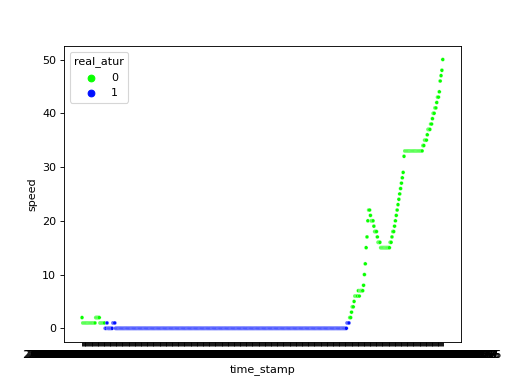

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [58]:
dft20 = dfA1b3.loc[7906:8598,:].copy()
dft20['real_atur']=0
realparado1(dft20);

sns.scatterplot(data = dft20, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')

               time_stamp       mmsi  status  turn  speed      lon       lat  \
7906  2022-06-04 20:56:26  247383400       0  -7.0    2.0  2.17733  41.36454   
7907  2022-06-04 20:56:36  247383400       0  -4.0    1.0  2.17733  41.36455   
7908  2022-06-04 20:56:45  247383400       0   0.0    1.0  2.17734  41.36455   
7909  2022-06-04 20:56:56  247383400       0   4.0    1.0  2.17734  41.36456   
7910  2022-06-04 20:57:05  247383400       0   3.0    1.0  2.17734  41.36456   
...                   ...        ...     ...   ...    ...      ...       ...   
8594  2022-06-05 01:59:37  247383400       0  14.0   44.0  2.17803  41.36009   
8595  2022-06-05 01:59:47  247383400       0  13.0   46.0  2.17794  41.35989   
8596  2022-06-05 01:59:56  247383400       0  12.0   47.0  2.17785  41.35971   
8597  2022-06-05 02:00:06  247383400       0  12.0   48.0  2.17774  41.35950   
8598  2022-06-05 02:00:16  247383400       0   9.0   50.0  2.17761  41.35929   

      course  heading         day  ... 

<IPython.core.display.Javascript object>


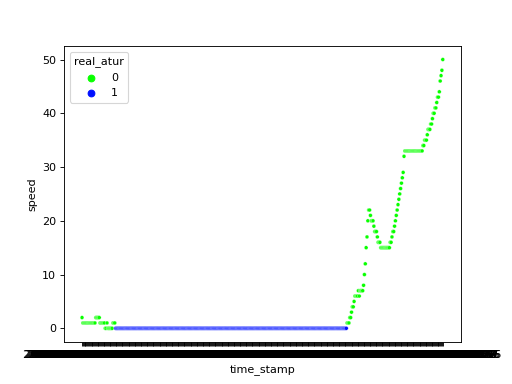

<AxesSubplot:xlabel='time_stamp', ylabel='speed'>

In [26]:
dft20 = dfA1b3.loc[7906:8598,:].copy()
dft20['real_atur']=0
realparado2(dft20);

sns.scatterplot(data = dft20, x = 'time_stamp',y = 'speed', s = 12, hue = 'real_atur', palette = 'hsv')